In [1]:
import numpy as np
import random
import data as dt 
import matplotlib.pyplot as plt
import geometry as geo
from rtree import index
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geometry as geo
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [37]:
#0 array from 0 to 1000 with step 2 

max_ = 300
step = 1
x0 = np.arange(0, max_, step)
y0 = np.arange(0, max_, step)
# lets create a set of sizes
width = np.array([1, 2, 3, 4])
height = np.array([1, 2, 3, 4])
# lets create a set of rotations
# rotation will be from 0 to 90 degrees
mu = [10, 25, 45, 66]
sigma = [5, 10, 15, 20]
num = 1000
rotation0 = dt.rotations(mu, sigma, num)
print("max rotation and min are: ", np.max(rotation0), np.min(rotation0))

max rotation and min are:  89.93381080260903 0.13671109653137847


In [38]:
# create rectangular parallelograms with rotation
# each parallelogram witll have a rotation angle, but the vertices will be  90 degrees
def create_rectangles(x0, y0, width, height, rotation0,num):

    data = np.zeros(shape=(num,5))
    for i in range(num):
        x = np.random.choice(x0)
        y = np.random.choice(y0)
        w = np.random.choice(width)
        h = np.random.choice(height)
        rot = np.random.choice(rotation0)
        # if they overlap then we need to create a new one until it does not overlap
        if not check_intersection(data, x, y, w, h, rot):
            data[i][0] = x
            data[i][1] = y
            data[i][2] = w
            data[i][3] = h
            data[i][4] = rot

        
    return data
        

# create a set of rectangles
data = create_rectangles(x0, y0, width, height, rotation0,num)

In [25]:
# create square points from the data
def create_rectangle_points(data):
    x = data[0]
    y = data[1]
    w = data[2]
    h = data[3]
    rot = data[4]
    rot = np.deg2rad(rot)
    # create a set of points
    for i in range(data.__len__()):
        rect = np.array([[x, y], [x+w, y], [x+w, y+h], [x, y+h]])
        rect = np.array([geo.rotate_point(rect[0],rect[j], rot) for j in range(rect.__len__())])
    return rect
        

In [14]:
def check_intersection(data, x, y, w,h, rotation):
    """
        Check if a square intersects with any of the squares in data

        Parameters:
            data (list): list of np.array of the vertices of the squares
            x (float): x coordinate of the center of the square
            y (float): y coordinate of the center of the square
            size (float): size of the square
            rotation (float): rotation of the square in degrees

        Returns:
            bool: True if the square intersects with any of the squares in data
    """
    # create a square
    square = create_rectangle_points([x, y, w,h, rotation])
    # check if it intersects with any of the squares in the data
    for i in range(data.__len__()):
        # create a square
        square2 = create_rectangle_points([data[i][0], data[i][1], data[i][2], data[i][3], data[i][4]])
        # check if they intersect
        if geo.check_if_intersect2(square, square2):
            return True
    return False


In [34]:
# create square points from the data
def create_rectangles_points(data):
    x = data[:,0]
    y = data[:,1]
    w = data[:,2]
    h = data[:,3]
    rot = data[:,4]
    rot = np.deg2rad(rot)
    # create a set of points
    data_new = np.zeros(shape=(data.shape[0],4,2))
    print(data_new.shape)
    print("=====================================")
    for i in range(data.shape[0]):
        rect = np.array(
            [[x[i], y[i]], [x[i] + w[i], y[i]], [x[i] + w[i], y[i] + h[i]], [x[i], y[i] + h[i]]])
        # rotate the points
        rect = np.array([geo.rotate_point(rect[0],rect[j], rot[i]) for j in range(rect.shape[0])])
        print("=====================================")
        print(rect)
        # assigned rect to data
        data_new[i] = rect
    return data_new
        

In [ ]:
data_ne=create_rectangles_points(data)

In [38]:
data_ne.shape

(10, 4, 2)

In [ ]:
# lets create a set of rectangles with rotation
def rects(x0, y0, width, height, rotation0):
    # create a set of rectangles with rotation 
    # x0, y0 are the coordinates of the vertex of the rectangle
    # width and height are the width and height of the rectangle
    # rotation0 is the rotation of the rectangle
    # the rotation is in degrees
    # the rotation is from 0 to 90 degrees
    # the rotation is from the vertex of the rectangle
    # the rotation is clockwise
    for i in range(x0.__len__()):
        for j in range(y0.__len__()):
            for k in range(width.__len__()):
                for l in range(height.__len__()):
                    for m in range(rotation0.__len__()):
                        # create a rectangle
                        rect = np.array(
                            [[x0[i], y0[j]], [x0[i] + width[k], y0[j]],
                             [x0[i] + width[k], y0[j] + height[l]],
                             [x0[i], y0[j] + height[l]]])
                        # rotate the rectangle
                        rotation = np.deg2rad(rotation0[m])
                        rect = np.array(
                            [geo.rotate_point(rect[0], rect[i], rotation)
                             for i in range(rect.__len__())])
                        yield rect

In [ ]:
# find angle of 3 vertices
def angle(p1, p2, p3):
    # find the angle of 3 vertices
    # p1, p2, p3 are the vertices
    # the angle is in radians
    # the angle is from p1 to p2 to p3
    # the angle is clockwise
    # the angle is from 0 to 2*pi
    # the angle is from p1 to p2 to p3
    # the angle is clockwise
    # the angle is from 0 to 2*pi
    a = np.array(p1)
    b = np.array(p2)
    c = np.array(p3)
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return angle

# find the angle of the rectangle
print(np.rad2deg(angle(rect[1], rect[2], rect[3])))

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geometry as geo
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def plot_data(data, size=10, limits=[-10, 10, -10, 10]):
    fig, ax = plt.subplots(figsize=(size, size))
    patches = []
    num_polygons = data.__len__()

    for i in range(num_polygons):
        rectangle = data[i]
        polygon = Polygon(rectangle, True)
        patches.append(polygon)

    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

    colors = 100*np.random.rand(len(patches))
    p.set_array(np.array(colors))

    ax.add_collection(p)
    ax.set_xlim(limits[0], limits[1])
    ax.set_ylim(limits[2], limits[3])
    plt.show()


In [32]:
data_ne[0]

array([[ 79.        , 152.        ,   4.        ,   4.        ,
         16.45320668],
       [ 45.        ,   1.        ,   4.        ,   4.        ,
          6.20828369]])

In [44]:
# save both the data and the labels
np.save("rectangle_data_points.npy", data_ne)
np.save("rectangle_data_labels.npy", data)

In [42]:
data_ne.shape

(1000, 4, 2)

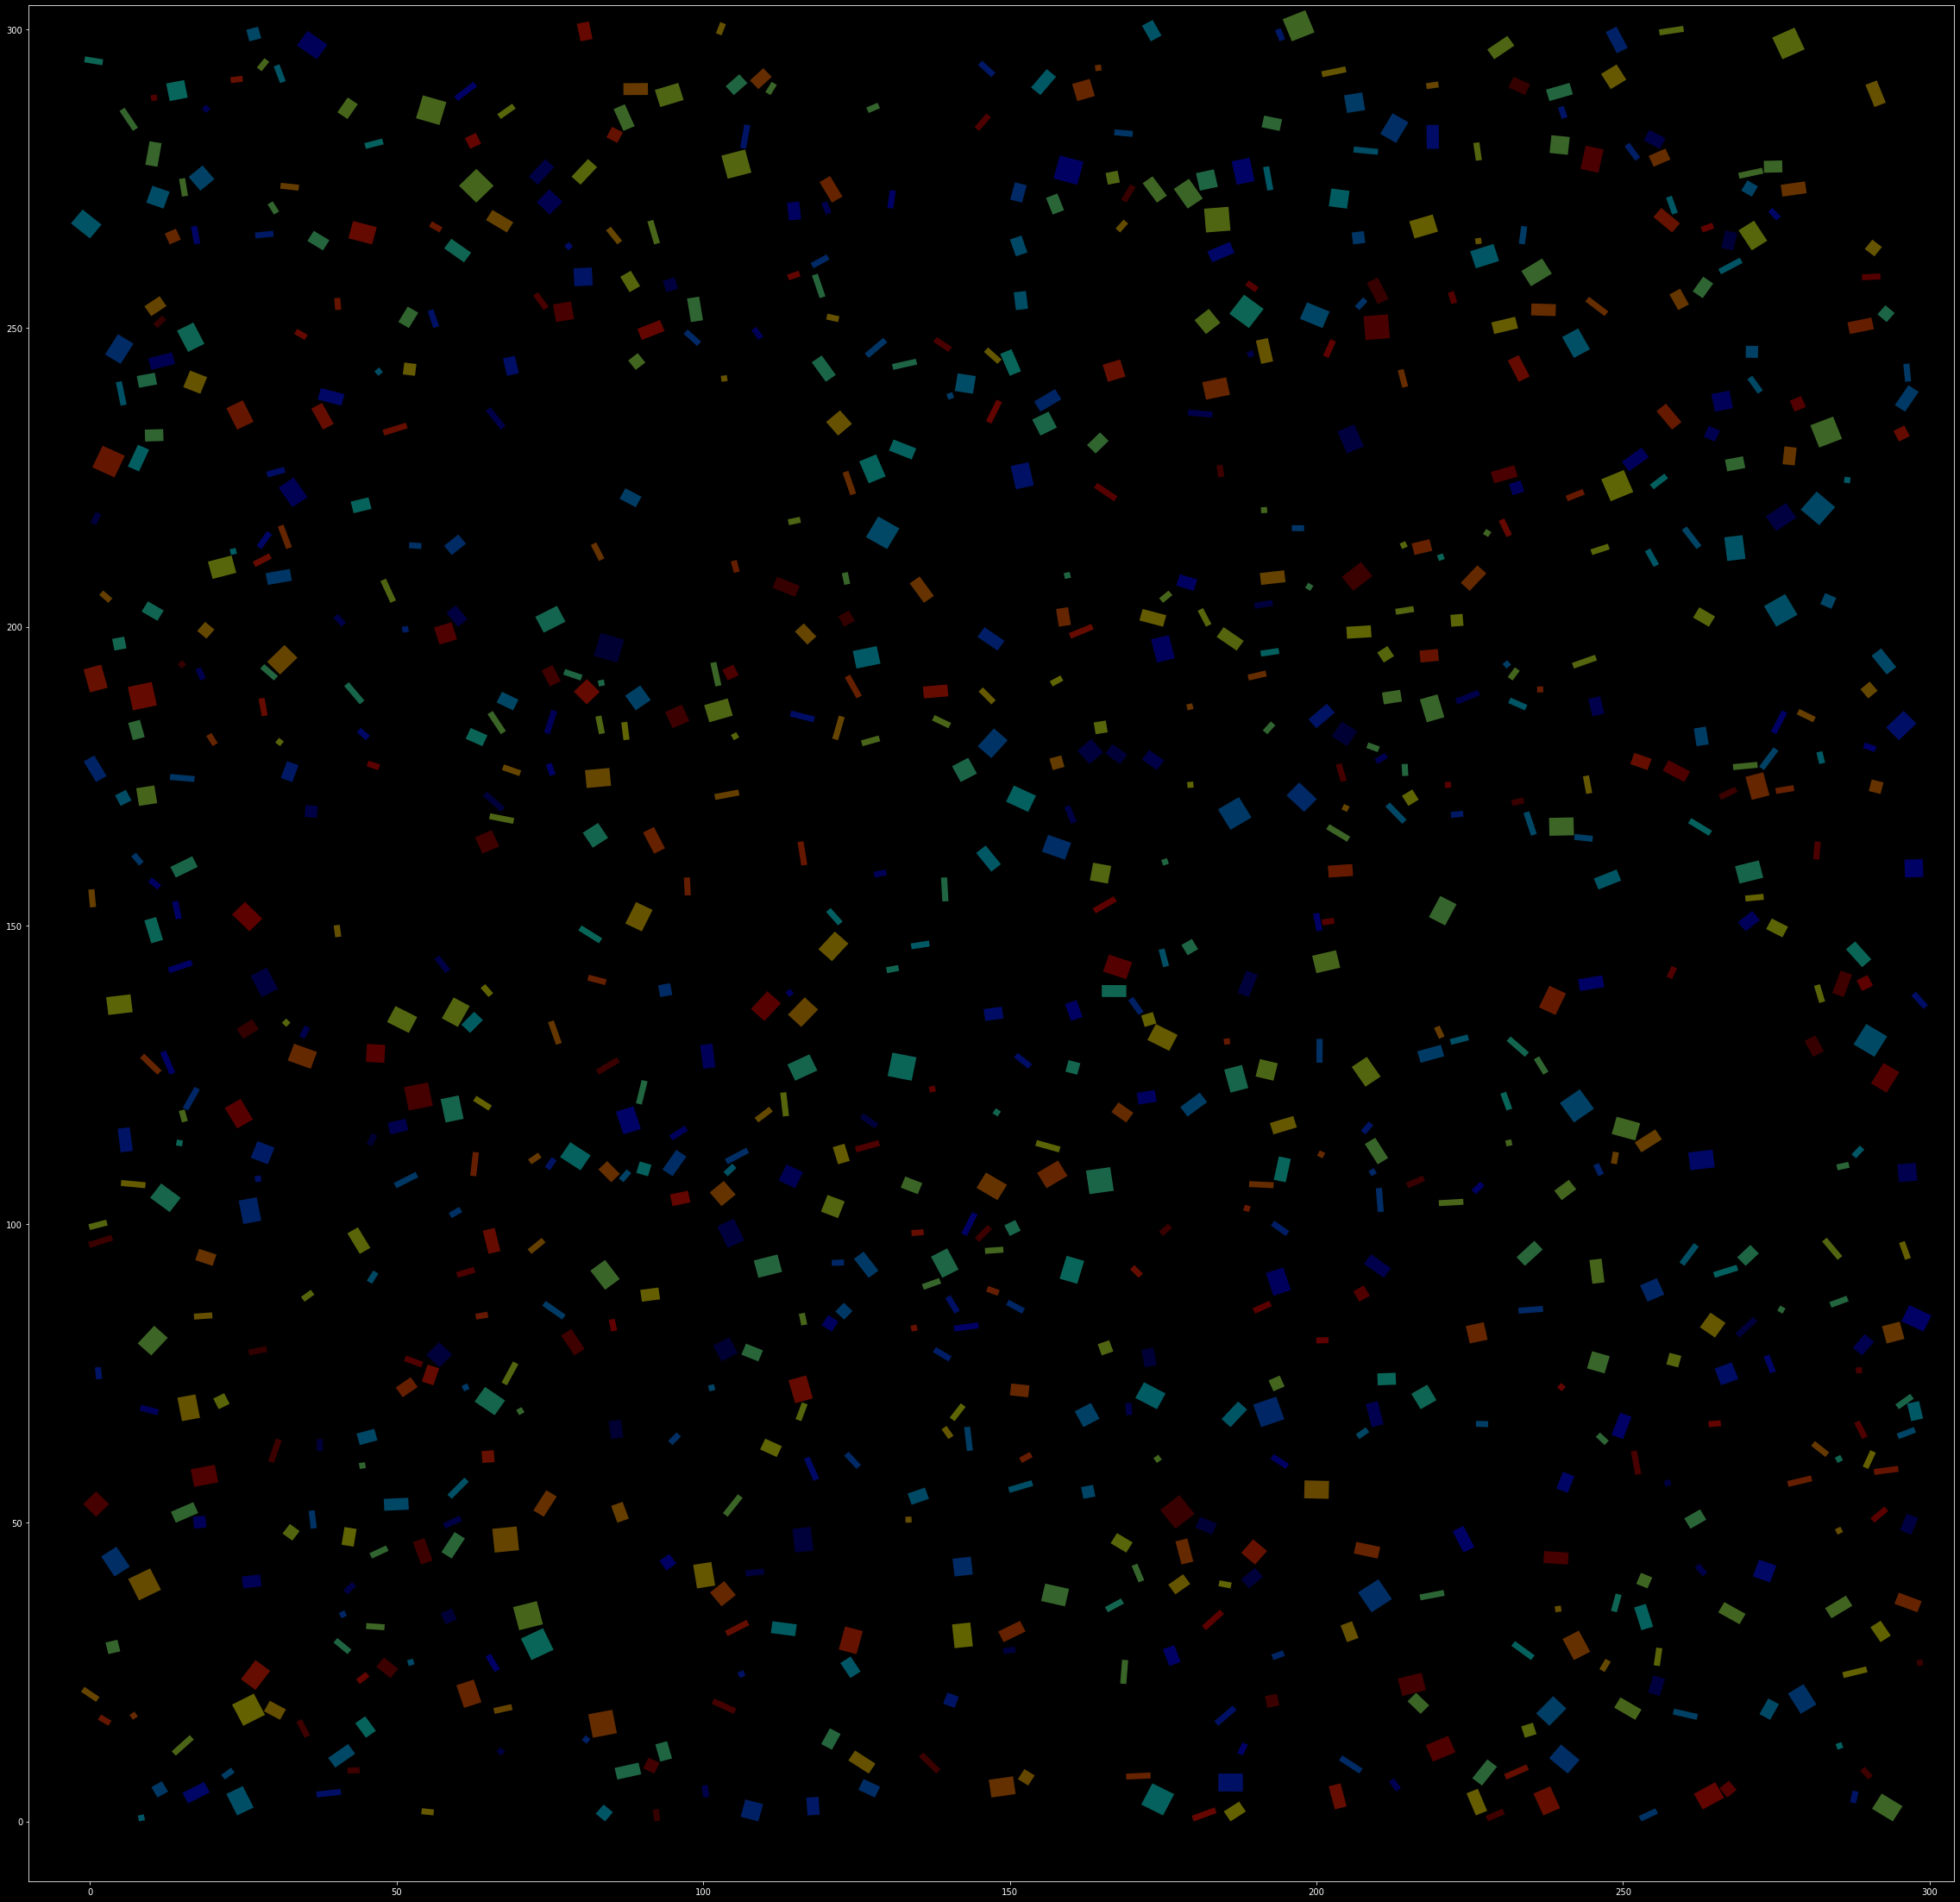

In [59]:
plot_data(data_ne,size=40,limits=[-10,304,-10,304])

In [60]:
# lets find nearest neighbour.
def distance_from_rectangle(point, square):
    x0 = point[0]
    y0 = point[1]
    px0 = square[0]
    py0 = square[1]
    w = square[2]
    h = square[3]
    #pl = square[2]
    dist = 0
    distx=0
    disty=0
    # distance for l = 0
    dx = px0 - x0
    dy = py0 - y0
    # distance for l = pl
    dxl= dx + w
    dyl= dy + h
    cases = [dx>0,dx<0,dy>0,dy<0,dxl>0,dxl<0,dyl>0,dyl<0]
    # check x axis first
    if dxl < 0:
        distx = abs(dxl)
    elif dx > 0:
        distx = abs(dx)
    else:
        distx = 0

    # check y axis
    if dyl < 0:
        disty = abs(dyl)
    elif dy > 0:
        disty = abs(dy)
    else:
        disty = 0
    
    dist = np.sqrt(distx**2 + disty**2)
    return dist

def dist_rsq(point, square):
    # rotate the point
    point = rotate_point([square[0],square[1]],point, np.deg2rad(square[-1]))
    #print("point: ", point)
    dist = distance_from_rectangle(point, square)
    return dist
def get_deg(p1, p2):
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    if x1 == x2:
        if y1 > y2:
            return 90
        else:
            return 270
    else:
        m = (y2-y1)/(x2-x1)
        #print("m: ", m)
        deg = np.rad2deg(np.arctan(m))
        if x1 > x2:
            deg += 180
        elif y1 > y2:
            deg += 360
        return deg
def rotate_point(init_point, point, theta):
    if np.all(init_point == point):
        return point

    else:
        x0 = init_point[0]
        y0 = init_point[1]
        x1 = point[0]
        y1 = point[1]
        theta_0 = np.deg2rad(get_deg(init_point, point))
        theta_r = theta
        theta_1 = theta_0 - theta_r
        #print("theta_0: ", theta_0)
        #print("theta_r: ", theta_r)
        #print("theta_1: ", theta_1)
        dist = np.sqrt((x0-x1)**2 + (y0-y1)**2)
        pr = np.rad2deg(theta_1)
        if pr>=0 and pr<=90:
            prx = 1
            pry = 1
        elif pr>90 and pr<=180:
            prx = -1
            pry = 1
        elif pr>180 and pr<=270:
            prx = -1
            pry = -1
        else:
            prx = 1
            pry = -1

        #print("dist: ", dist)
        x1_r = x0 +prx* dist/(np.sqrt(1+np.tan(theta_1)**2))
        #print("x1_r: ", x1_r)

        y1_r = y0 +pry* np.sqrt(dist**2 - (x1_r-x0)**2)
        #print("y1_r: ", y1_r)
        return [x1_r, y1_r]
    
    
def bf_nn_rects(data, point):
    min_dist = 100000
    min_index = 0
    for i in range(data.__len__()):
        dist = dist_rsq(point, data[i])
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return min_index, min_dist


In [61]:
print(bf_nn_rects(data, [100, 100]))

(505, 2.3156572901759125)


In [58]:
data[505]

array([104.       ,  96.       ,   3.       ,   4.       ,  25.4191733])